In [1]:
#https://www.statology.org/linear-discriminant-analysis-in-python/
import sys
print(sys.executable)
import sklearn

/Users/li11/opt/anaconda3/envs/snake/bin/python


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print ("libraries loaded")

libraries loaded


In [10]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
print(df.head())
#find how many total observations are in dataset
print(len(df.index))
type(df)

   s_length  s_width  p_length  p_width  target species
0       5.1      3.5       1.4      0.2     0.0  setosa
1       4.9      3.0       1.4      0.2     0.0  setosa
2       4.7      3.2       1.3      0.2     0.0  setosa
3       4.6      3.1       1.5      0.2     0.0  setosa
4       5.0      3.6       1.4      0.2     0.0  setosa
150


pandas.core.frame.DataFrame

In [4]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [6]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9800000000000001


In [12]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

/Users/jyli/opt/anaconda3/envs/myNAS/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

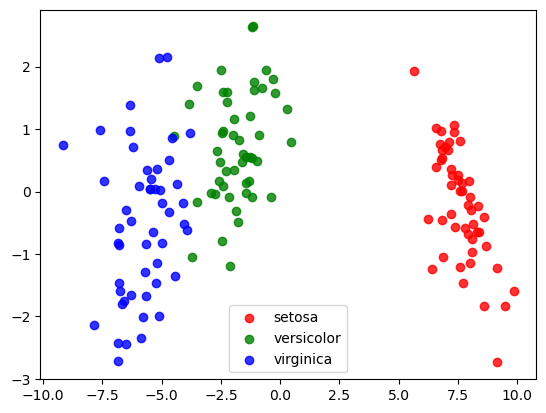

In [7]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()